# PH7013
Sample code from https://qutip.org/docs/latest/guide/dynamics/dynamics-time.html

In [164]:
import numpy as np
from qutip import *
%matplotlib inline
import matplotlib.pyplot as plt

In [165]:
from scipy.signal import argrelextrema

In [166]:
with open("rename.py") as f:
    exec(f.read())

In [167]:
ustate = basis(3, 0)
excited = basis(3, 1)
ground = basis(3, 2)

N = 2 # Set where to truncate Fock state for cavity
sigma_ge = tensor(qeye(N), ground * excited.dag())  # |g><e|
sigma_ue = tensor(qeye(N), ustate * excited.dag())  # |u><e|
a = tensor(destroy(N), qeye(3))
ada = tensor(num(N), qeye(3))

c_ops = []  # Build collapse operators
kappa = 1.5 # Cavity decay rate
c_ops.append(np.sqrt(kappa) * a)
gamma = 6  # Atomic decay rate
c_ops.append(np.sqrt(5*gamma/9) * sigma_ue) # Use Rb branching ratio of 5/9 e->u
c_ops.append(np.sqrt(4*gamma/9) * sigma_ge) # 4/9 e->g

t = np.linspace(-15, 15, 100) # Define time vector
psi0 = tensor(basis(N, 0), ustate) # Define initial state

state_GG = tensor(basis(N, 1), ground) # Define states onto which to project
sigma_GG = state_GG * state_GG.dag()
state_UU = tensor(basis(N, 0), ustate)
sigma_UU = state_UU * state_UU.dag()

g = 5  # coupling strength
H0 = -g * (sigma_ge.dag() * a + a.dag() * sigma_ge)  # time-independent term
H1 = (sigma_ue.dag() + sigma_ue)  # time-dependent term

In [168]:
print([H1,H1_coeff])

[Quantum object: dims = [[2, 3], [2, 3]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]], <function H1_coeff at 0x000001AE14EF7100>]


However, when specifying Python functions for coefficients, the function must have (t,args) as the input variables, in that order.

(<Figure size 800x400 with 3 Axes>,
 array([[<Axes: >],
        [<Axes: >],
        [<Axes: xlabel='time'>]], dtype=object))

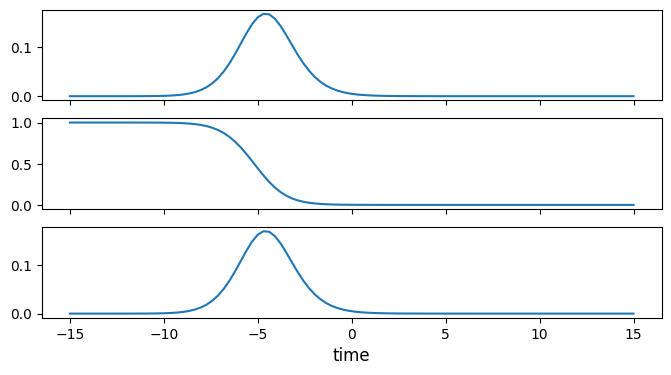

In [169]:
# Time dependent Hamiltonian
def H1_coeff(t, args):
    return 9 * np.exp(-(t / 5.) ** 2)

H = [H0,[H1, H1_coeff]]
# Call the solver
output = mesolve(H, psi0, t, c_ops, [ada, sigma_UU, sigma_GG])
plot_expectation_values(output)

## Noise

In [170]:
t = np.linspace(-15, 15, 100)
func = lambda t: 9*np.exp(-(t / 5)** 2)
noisy_func = lambda t: func(t)+(0.05*func(t))*np.random.randn(t.shape[0])
noisy_data = noisy_func(t)
S = Cubic_Spline(t[0], t[-1], noisy_data)

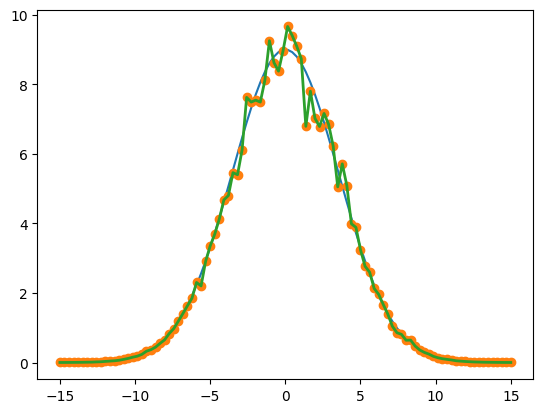

In [171]:
plt.figure()
plt.plot(t, func(t))
plt.plot(t, noisy_data, 'o')
plt.plot(t, S(t), lw=2)
plt.show()

(<Figure size 800x400 with 3 Axes>,
 array([[<Axes: >],
        [<Axes: >],
        [<Axes: xlabel='time'>]], dtype=object))

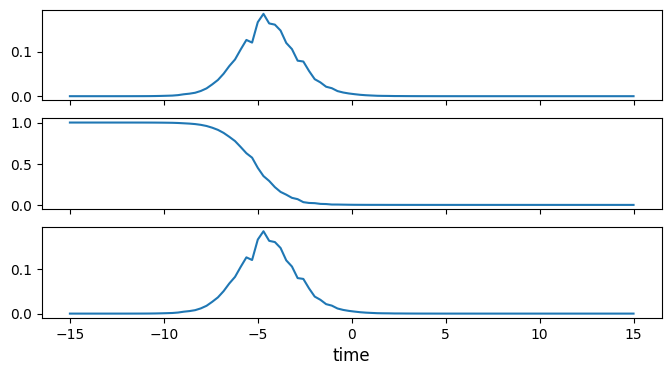

In [172]:
H = [H0, [H1, S]]
# Call the solver
output = mesolve(H, psi0, t, c_ops, [ada, sigma_UU, sigma_GG])
plot_expectation_values(output)

## My code

In [173]:
excited = basis(2, 0)
ground = basis(2, 1)

N = 2 # Set where to truncate Fock state for cavity
sigma_ge = tensor(qeye(N), ground * excited.dag())  # |g><e|
a = tensor(destroy(N), qeye(2))
ada = tensor(num(N), qeye(2))

c_ops = []  # Build collapse operators
kappa = 1.5 # Cavity decay rate
c_ops.append(np.sqrt(kappa) * a)
gamma = 6  # Atomic decay rate
c_ops.append(np.sqrt(4*gamma/9) * sigma_ge) # 4/9 e->g

t = np.linspace(-15, 15, 100) # Define time vector
psi0 = tensor(basis(N, 0), ground) # Define initial state

state_GG = tensor(basis(N, 1), ground) # Define states onto which to project
sigma_GG = state_GG * state_GG.dag()

g = 5  # coupling strength
H0 = -g * (sigma_ge.dag() * a + a.dag() * sigma_ge)  # time-independent term
H1 = (sigma_ge.dag() + sigma_ge)  # time-dependent term

In [174]:
print(H0)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0. -5.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [-5.  0.  0.  0.]]


(<Figure size 800x400 with 1 Axes>,
 array([[<Axes: xlabel='time'>]], dtype=object))

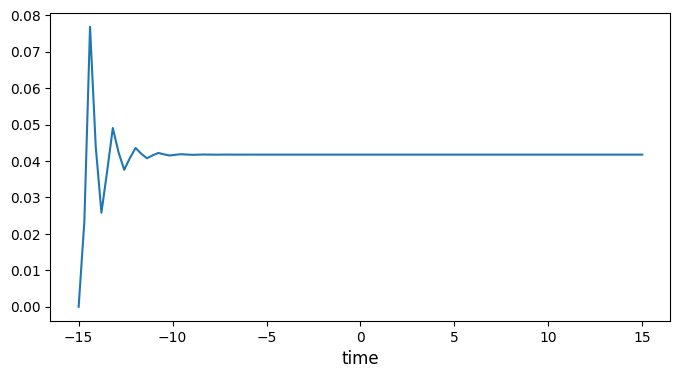

In [175]:
# Time dependent Hamiltonian
def H1_coeff(t, args):
    return 9 * np.exp(-(t / 5.) ** 2)

H = [H0,H1]
# Call the solver
output = mesolve(H, psi0, t, c_ops, [sigma_GG])
plot_expectation_values(output)

Original Operator

In [176]:
VStd = 0.01
phaseStd = 0.382 / 180 * np.pi
detuningStd = 52769

omega = 20e6 # 20MHz
VNaught = 1
hbar = 1
phiNaught = 0
aNaught = 25 / 46

V = VNaught + np.random.normal(scale=VStd)
phi = phiNaught + np.random.normal(scale=phaseStd)
I = np.cos(phi)
Q = np.sin(phi)
s = aNaught - (1 - aNaught) * np.cos(2 * np.pi * t / t[-1])
t = np.linspace(0.0, 10.0, 100)

def H(t, args):
    dwt = np.random.normal(scale=detuningStd) * t
    return omega * np.pi * V * ((-I * np.cos(dwt) + Q * np.sin(dwt)) * tensor(identity(2),sigma_x()) + (I * np.sin(dwt) - Q * np.cos(dwt)) * tensor(identity(2),sigma_y()))
    

Reduced operator

In [177]:
VStd = 0.01
phaseStd = 0.382 / 180 * np.pi
detuningStd = 52769

omega = 20e6 # 20MHz
VNaught = 1
hbar = 1
phiNaught = 0
aNaught = 25 / 46

V = VNaught + np.random.normal(scale=VStd)
phi = phiNaught + np.random.normal(scale=phaseStd)
I = np.cos(phi)
Q = np.sin(phi)
s = aNaught - (1 - aNaught) * np.cos(2 * np.pi * t / t[-1])
t = np.linspace(0.0, pi_pulse_duration, 100)

def H(t, args):
    dwt = t
    return ((-I * np.cos(dwt) + Q * np.sin(dwt)) * tensor(identity(2),sigma_x()) + (I * np.sin(dwt) - Q * np.cos(dwt)) * tensor(identity(2),sigma_y()))
    

Finding the pulse duration

In [161]:
maximum_array = argrelextrema(result.expect[0], np.greater)
first_max = maximum_array[0][0]
second_max = maximum_array[0][1]
pi_pulse_duration = result.times[second_max] - result.times[first_max]

Text(0, 0.5, 'Expectation Value')

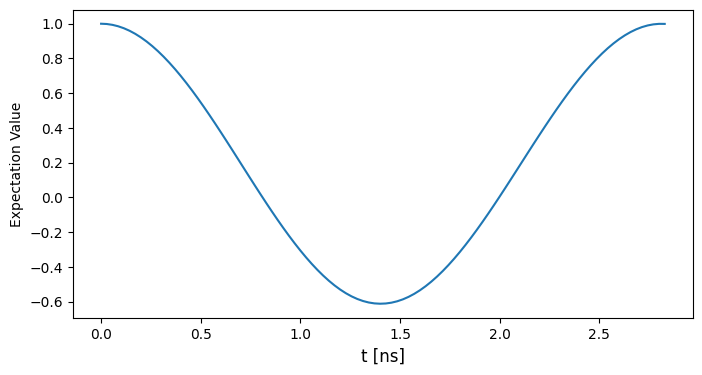

In [178]:
psi0 = tensor(ground,ground)
result = sesolve(H, psi0, t, [tensor(sigmaz(),sigmaz())])
plot_expectation_values(result)
plt.xlabel("t [ns]")
plt.ylabel("Expectation Value")